# Neural Networks with scikit-learn

Neural networks are amongst the most complex and flexible machine/deep learning models, due to this, their capability to tackle more complex problems is huge. However, due to this flexibility, they are also easier to overfit, which is why it's the data scientists job to find the correct hyper-parameters for these models.

In order to do this, we'll use scikit learn in the same way we always have. In this case, however, neural networks have a lot more than 1 parameter, in case of the multi-layer perceptron models in scikit-learn the parameters are:

* hidden_layer_sizes
* activation
* solver
* alpha
* batch_size
* learning_rate
* learning_rate_init
* power_t
* max_iter
* shuffle
* random_state
* tol
* verbose
* warm_start
* momentum
* nesterovs_momentum
* early_stopping
* validation_fraction
* beta_1
* beta_2
* epsilon
* n_iter_no_change

You can read more about each one [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

## The data (MNIST)

Let's load the digit data from MNIST.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_train_id = '1W-PGHpcl6FFV_V1eaPNsyJms9laSdnmt'
file_train = drive.CreateFile({'id': file_train_id})
file_train.GetContentFile("train.csv")

file_test_id = '16uEssOvapZsNvscKcb9KdyRhosPEBukq'
file_test = drive.CreateFile({'id': file_test_id})
file_test.GetContentFile("test.csv")

In [0]:
import pandas as pd

data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv") # Only for Kaggle

We visualize the already familiar data with the modified label type to category.

In [0]:
data.label = data.label.astype("category")

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We split the data set into a test and training set.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop("label", axis = 1), data.label, test_size = 0.3)

## The network

This classifier is a dense neural network, which can be visualized as:

![By Glosser.ca - Own work, Derivative of File:Artificial neural network.svg, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=24913461](https://github.com/ClementFelipe/ai-class-lab/blob/master/07-deep-learning/resources/nnet.png?raw=1)

This network architecture is the **MLPClassifier** in scikit-learn, first we will try a network with one hidden with default parameters.

In [0]:
from sklearn.neural_network import MLPClassifier

net = MLPClassifier(verbose = True)
net.fit(x_train, y_train)

Iteration 1, loss = 8.69544639
Iteration 2, loss = 1.45531198
Iteration 3, loss = 0.74634259
Iteration 4, loss = 0.48005803
Iteration 5, loss = 0.34788734
Iteration 6, loss = 0.27587872
Iteration 7, loss = 0.21212238
Iteration 8, loss = 0.18024399
Iteration 9, loss = 0.14741928
Iteration 10, loss = 0.13244188
Iteration 11, loss = 0.11657773
Iteration 12, loss = 0.10906752
Iteration 13, loss = 0.10349047
Iteration 14, loss = 0.09122203
Iteration 15, loss = 0.07936778
Iteration 16, loss = 0.07627667
Iteration 17, loss = 0.07693813
Iteration 18, loss = 0.08383788
Iteration 19, loss = 0.08001242
Iteration 20, loss = 0.07839557
Iteration 21, loss = 0.06583349
Iteration 22, loss = 0.09413323
Iteration 23, loss = 0.09862921
Iteration 24, loss = 0.09091375
Iteration 25, loss = 0.07865257
Iteration 26, loss = 0.07017265
Iteration 27, loss = 0.05955003
Iteration 28, loss = 0.07659591
Iteration 29, loss = 0.07059128
Iteration 30, loss = 0.06556007
Iteration 31, loss = 0.07426077
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

Notice the default parameters above after the description of the epochs (iterations).

Now we can visualize it's accuracy in the test set.

In [0]:
net.score(x_test, y_test)

0.9505555555555556

Out of the box, this model will give us an accuracy of 95-96%. Let's explore some basic parameters and what they mean.

### Learning rate (learning_rate_init)

This parameter controls the size of the "steps" a network takes when performing gradient descent, if this is too low, the network will take very long to converge, if it's too high, it might diverge instead, let's see some examples.

Also below is a visualization of how the learning rates behave.

-----------Starting training with lr 0.0001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished lr 0.0001 with score 0.9188095238095239
-----------Starting training with lr 0.001


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished lr 0.001 with score 0.9454761904761905
-----------Starting training with lr 0.01
-----------Finished lr 0.01 with score 0.8374603174603175
-----------Starting training with lr 0.1
-----------Finished lr 0.1 with score 0.10095238095238095


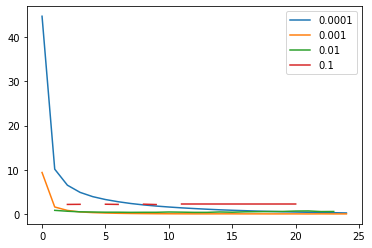

In [0]:
import matplotlib.pyplot as plt

learning_rates = [0.0001, 0.001, 0.01, 0.1]
scores = []

for lr in learning_rates:
    print(f"-----------Starting training with lr {lr}")
    model = MLPClassifier(learning_rate_init = lr, verbose = False, max_iter=25)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    plt.plot(model.loss_curve_, label=lr)

    scores.append(score)
    print(f"-----------Finished lr {lr} with score {score}")
plt.legend()
plt.show()

We can see that low learning rates will take very long to converge and as such don't achieve good accuracy given the same number of epochs. Now we visualize the results.

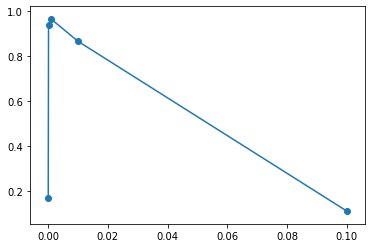

In [0]:
plt.plot(learning_rates, scores)
plt.scatter(learning_rates, scores)

We can see that as the learning rate increases too much, accuracy immediately drops due to the model diverging, whereas when the learning rate is low, it has lower accuracy than the higher (but not too high) learning rates after it.

Now let's keep this learning rate and see the effect of the number of epochs.

### Epochs (max_iter)

This parameter controls how many times tha dataset will perform backpropagation, this means how many times the data will pass through (feed-forward) the data and adjust it's weights (back-propagation).

In [0]:
n_iters = [2, 4, 8, 16, 32, 64, 128]
scores = []

for n in n_iters:
    print(f"-----------Starting training with n_iter {n}")
    model = MLPClassifier(verbose = False, max_iter=n, n_iter_no_change = int(n/2), tol=1e-8)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores.append(score)
    print(f"-----------Finished n_iter {n} with score {score}")

-----------Starting training with n_iter 2


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished n_iter 2 with score 0.8969047619047619
-----------Starting training with n_iter 4


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished n_iter 4 with score 0.9128571428571428
-----------Starting training with n_iter 8


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished n_iter 8 with score 0.9205555555555556
-----------Starting training with n_iter 16


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished n_iter 16 with score 0.9307142857142857
-----------Starting training with n_iter 32


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished n_iter 32 with score 0.948015873015873
-----------Starting training with n_iter 64


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished n_iter 64 with score 0.9566666666666667
-----------Starting training with n_iter 128
-----------Finished n_iter 128 with score 0.9626190476190476


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


We can see that as the number of epochs increases, our accuracy does too.

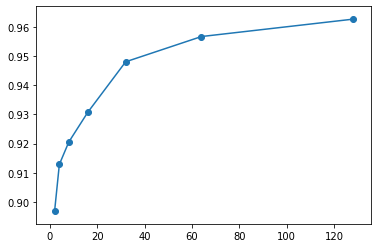

In [0]:
plt.plot(n_iters, scores)
plt.scatter(n_iters, scores)

### Layers (hidden_layer_sizes)

Now let's try modifying the layers, we will try 1 hidden layer with 100 neurons (default), 2 hidden layers with 20 and 10 neurons, 3 hidden layers with 30, 20 and 10 neurons and 4 hidden layers with 100, 30, 20, 10 neurons. We will use a learning rate of 0.001 (default).

In [0]:
layers = [(100), (100, 10), (100, 50, 10), (100, 50, 20, 10)]
scores = []

for lyr in layers:
    print(f"-----------Starting training with lr {lyr}")
    model = MLPClassifier(hidden_layer_sizes = lyr, verbose = False, max_iter=50, n_iter_no_change = 40, tol = 1e-8)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores.append(score)
    print(f"-----------Finished lr {lyr} with score {score}")

-----------Starting training with lr 100


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished lr 100 with score 0.9511111111111111
-----------Starting training with lr (100, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished lr (100, 10) with score 0.9519047619047619
-----------Starting training with lr (100, 50, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------Finished lr (100, 50, 10) with score 0.9545238095238096
-----------Starting training with lr (100, 50, 20, 10)
-----------Finished lr (100, 50, 20, 10) with score 0.9611111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


We can see that all results are similar, let's try something a bit deeper. (takes long to execute)

In [0]:
model = MLPClassifier(hidden_layer_sizes = (2500, 2000, 1500, 1000, 500), verbose = True, max_iter = 10, n_iter_no_change = 10, tol = 0.0000005)
model.fit(x_train, y_train)
model.score(x_test, y_test)

Iteration 1, loss = inf
Iteration 2, loss = 0.14055122
Iteration 3, loss = 0.09505866
Iteration 4, loss = 0.06967283
Iteration 5, loss = 0.05815726
Iteration 6, loss = 0.05251947
Iteration 7, loss = 0.04786868
Iteration 8, loss = 0.04045275
Iteration 9, loss = 0.03728171
Iteration 10, loss = 0.03630677


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9671428571428572

We can see that the accuracy is immediately better than the previous models, even with a low epoch count. But how do we arrive at this model? One way to do it (if you have sufficiently powerful hardware) is to use cross validation to search combinations of parameters.

In order to look for the right params, and have it not be so problematic, let's use an already defined scikit-learn function called **GridSearchCV**. This function will help us by making all the combinations of the parameters we give it and using them in the network.

In [0]:
from sklearn.model_selection import GridSearchCV

model = MLPClassifier(max_iter=10, tol=1e-8, early_stopping=True, batch_size=200)

parameters = {
    "hidden_layer_sizes": [(100)],
    "activation": ["tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.0001, 0.00001],
    "learning_rate": ["invscaling", "adaptive"],
    "momentum": [0.9, 0.95]
}

search = GridSearchCV(model, parameters, cv = 5, n_jobs=-1, verbose=2)
search.fit(data.drop("label", axis = 1), data.label)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 26.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=200, beta_1=0.9, beta_2=0.999,
                                     early_stopping=True, epsilon=1e-08,
                                     hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=10,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=No...
                                     solver='adam', tol=1e-08,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha

In [0]:
estimator=MLPClassifier(
    activation='relu', alpha=0.0001,
    batch_size=200, beta_1=0.9, beta_2=0.999,
    early_stopping=True, epsilon=1e-08,
    hidden_layer_sizes=(100,),
    learning_rate='constant',
    learning_rate_init=0.001, max_iter=100,
    momentum=0.9, n_iter_no_change=10,
    nesterovs_momentum=True, power_t=0.5,
    solver='adam', tol=1e-08,
    validation_fraction=0.1, verbose=False,
    warm_start=False
).fit(x_train, y_train)

estimator.score(x_test, y_test)

0.9535714285714286

## Tensorflow + Keras

Tensorflow is the famous machine learning framework from Google, with it we can perform any machine learning algorithm. It works by using a programming style combining a special mathematical construct called a Tensor (**similar** in a certain way to a multidimensional array) and graph processing to achieve desired results. Meanwhile, Keras is a specification for building Neural Networks, it happens to be implemented in many machine learning frameworks, including Tensorflow. Here we will use Keras to build a convolutional neural network to predict the digits from MNIST.

Here we import Tensorflow 2 using the python magic (this magic only exists in Colab).

In [0]:
%tensorflow_version 2.x

import tensorflow as tf

TensorFlow 2.x selected.


Now we can load the MNIST dataset, which come along with a variety of other datasets in keras.

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

The previous dataset, as can be seen is a multidimensional array representing the matrix of values for the digits. Now we will create a regular dense model using keras.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The above lines create the model in a simple high level API implemented in Tensorflow for Keras. Now we will fit the model.

In [0]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2935 - accuracy: 0.9153
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1444 - accuracy: 0.9568
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1082 - accuracy: 0.9665
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0886 - accuracy: 0.9726
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0740 - accuracy: 0.9767


This output show us each epoch along with it's training error and loss, we will now obtain the validation set error.

In [0]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 0.0397 - accuracy: 0.9766


[0.07721703117198776, 0.9766]

As we can see, we get an accuracy of 97% in this training with just 5 epochs. We have to take into account that this dataset is different from the previous one, in the sense that it has a lot more data in the training set, this, in part, is responsible for the out of the box increase in the accuracy. We will now try a more complex convolutional neural network.

We will first make some necessary transformations to the data.

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.1805 - accuracy: 0.9448
Epoch 2/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0760 - accuracy: 0.9770
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0576 - accuracy: 0.9825
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0485 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0404 - accuracy: 0.9878


Now we can find out the validation error!

In [0]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0137 - accuracy: 0.9923


[0.027371744615323407, 0.9923]